## <font color="#00cc99"> Get Michelin Starred & Reviewed Restaurants in the US</font> 
- This is a script I wrote because I love food and was looking for a well reviewed, inexpensive restaurant near me.
    - What it does is gets all Michelin starred & reviewed restaurants in the US, cleans the data, and then does some quick analysis.
- Get data from the website
- Analyze it 
- Export it to both CSV and google Sheet
    - Final export here: https://docs.google.com/spreadsheets/d/1Qx8dHKbngqP4AsUvD8vRRv8usaNIn9je5f4AlGnRX3I/edit?usp=sharing

### <font color="#FFFFF">Some Interesting Findings...</font> 
- It looks like Scandonavian restaurants and Steakhouses tend to be the most expensive
- Indonesian, Polish, Sengelese all look to be the lease expensive
- Greenwich & West Village is the neighborhood in NYC with the most Michelin starred / reviewed restaurants
- For the bay area the best restaurants look to be in Napa, which is funny because it is not in SF... but yes the food is good.
    - The first SF neighborhood is the Mission. So that makes sense, it only has the 5 best burritos in the world.

In [148]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen as uReq 
import pandas as pd
import requests
from df2gspread import df2gspread as d2g
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# action needed, this defines the places that are gettinga hot 100 boost
t = time()

page = requests.get("https://guide.michelin.com/us/san-francisco/restaurants")
print(page)

soup = BeautifulSoup(page.content, 'html.parser')

print(soup.prettify())

<Response [200]>
<!DOCTYPE doctype html>
<html class="no-js" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="vFUp7XI3G-xKLevkT2qftuscMInOxirdCu0oYr7_uLM" name="google-site-verification">
   <meta content="eZwPBJ-0r-9qysyJy_aEPti-m_vr-h_oUJy2qUR1144" name="google-site-verification">
    <meta content="#bd2333" name="theme-color"/>
    <meta content="michelin" name="layout">
     <meta content="Find all the Restaurants rated in the Michelin Guide San Francisco. Restaurant reviews &amp; useful information available online" name="description"/>
     <link href="https://guide.michelin.com/us/san-francisco/restaurants/page/1" rel="canonical"/>
     <title>
      San Francisco Michelin Restaurants – the Michelin Guide
     </title>
     <link href="https://d3btv8xorrgx1s.cloudfront.net/apple-touch-icon.png" rel="apple-touch-icon"/>
     <link href="https://d3btv8xorrgx1s.cloudfront.net/favicon-1.png" rel="ic

In [149]:
# Deeper dive into the elements of the page
[type(item) for item in list(soup.children)]
names_descs = [sd.get_text() for sd in soup.find_all('div', class_='resto-inner-title')]
details_descs = [sd.get_text() for sd in soup.find_all('div', class_='resto-inner-category')]

df = pd.DataFrame({
        "name": names_descs, 
        "details": details_descs
    })

print('Step complete')

["\n\n                                                        'āina\n                                                        =\n\n", '\n\n                                                        1601 Bar & Kitchen\n                                                        =\n\n', '\n\n                                                        1760\n                                                        ‹\n\n', '\n\n                                                        A Mano\n                                                        ‹\n\n', '\n\n                                                        A16\n                                                        =\n\n', '\n\n                                                        Acquerello\n                                                        n\n\n', '\n\n                                                        Ad Hoc\n                                                        ‹\n\n', '\n\n                                                     

## <font color="#00cc99">Scrape The Web</font> 
- Loop through different markets where they review restaurants

In [150]:

# Get all the places for San Francisco
blank_df = pd.DataFrame()

page_list = ["https://guide.michelin.com/us/san-francisco/restaurants/"
,"https://guide.michelin.com/us/san-francisco/restaurants/page/2?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/san-francisco/restaurants/page/3?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/san-francisco/restaurants/page/4?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/san-francisco/restaurants/page/5?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/san-francisco/restaurants/page/6?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/san-francisco/restaurants/page/7?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/san-francisco/restaurants/page/8?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/san-francisco/restaurants/page/9?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/san-francisco/restaurants/page/10?max=30&sort=relevance&order=desc"]

for p in page_list:
    page = requests.get(p)
    soup = BeautifulSoup(page.content, 'html.parser')
    names_descs = [sd.get_text() for sd in soup.find_all('div', class_='resto-inner-title')]
    details_descs = [sd.get_text() for sd in soup.find_all('div', class_='resto-inner-category')]
    df = pd.DataFrame({
            "name": names_descs, 
            "details": details_descs, 
        })
    df['name'] = df.name.str.strip()
    df['name'] = df.name.str.replace('\n', '')
    df['name'] = df.name.str.replace('=', '')
    df['name'] = df.name.str.replace('‹', '')
    df['name'] = df.name.str.replace('=', '')
    df['name'] = df.name.str.replace('   m', '')
    df['name'] = df.name.str.replace('   n', '')
    df['name'] = df.name.str.replace('   o', '')
    df['name'] = df.name.str.strip()
    df['details'] = df.details.str.strip()
    df['details'] = df.details.str.replace('\n', '')
    df['details'] = df.details.str.replace('=', '')
    df['details'] = df.details.str.replace('‹', '')
    df['details'] = df.details.str.replace('·', '')
    df['details'] = df.details.str.replace('                                                                                                                                                                 ', ', ')
    df['details'] = df.details.str.strip()
    blank_df = blank_df.append(df)

    
    
blank_df['market'] = "San Francisco"

print (blank_df.shape)
blank_df_sf = blank_df
blank_df.head()


(274, 3)


,name,details,market
0,'āina,"Hawaiian, Mission, From $25.00",San Francisco
1,1601 Bar & Kitchen,"Sri Lankan, SoMa, From $25.00",San Francisco
2,1760,"Contemporary, Nob Hill, From $50.00",San Francisco
3,A Mano,"Italian, Civic Center, From $25.00",San Francisco
4,A16,"Italian, Marina, From $25.00",San Francisco


In [151]:

# Get all the places for NYC
blank_df = pd.DataFrame()

page_list = ["https://guide.michelin.com/us/new-york/restaurants/"
,"https://guide.michelin.com/us/new-york/restaurants/page/2?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/new-york/restaurants/page/3?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/new-york/restaurants/page/4?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/new-york/restaurants/page/5?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/new-york/restaurants/page/6?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/new-york/restaurants/page/7?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/new-york/restaurants/page/8?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/new-york/restaurants/page/9?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/new-york/restaurants/page/10?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/new-york/restaurants/page/11?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/new-york/restaurants/page/12?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/new-york/restaurants/page/13?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/new-york/restaurants/page/14?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/new-york/restaurants/page/15?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/new-york/restaurants/page/16?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/new-york/restaurants/page/17?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/new-york/restaurants/page/18?max=30&sort=relevance&order=desc"]

for p in page_list:
    page = requests.get(p)
    soup = BeautifulSoup(page.content, 'html.parser')
    names_descs = [sd.get_text() for sd in soup.find_all('div', class_='resto-inner-title')]
    details_descs = [sd.get_text() for sd in soup.find_all('div', class_='resto-inner-category')]
    df = pd.DataFrame({
            "name": names_descs, 
            "details": details_descs, 
        })
    df['name'] = df.name.str.strip()
    df['name'] = df.name.str.replace('\n', '')
    df['name'] = df.name.str.replace('=', '')
    df['name'] = df.name.str.replace('‹', '')
    df['name'] = df.name.str.replace('=', '')
    df['name'] = df.name.str.replace('   m', '')
    df['name'] = df.name.str.replace('   n', '')
    df['name'] = df.name.str.replace('   o', '')
    df['name'] = df.name.str.strip()
    df['details'] = df.details.str.strip()
    df['details'] = df.details.str.replace('\n', '')
    df['details'] = df.details.str.replace('=', '')
    df['details'] = df.details.str.replace('‹', '')
    df['details'] = df.details.str.replace('·', '')
    df['details'] = df.details.str.replace('                                                                                                                                                                 ', ', ')
    df['details'] = df.details.str.strip()
    blank_df = blank_df.append(df)

    
    
blank_df['market'] = "New York City"
blank_df_nyc = blank_df
print (blank_df.shape)
blank_df.head()


(529, 3)


,name,details,market
0,00 + Co,"Vegan, East Village, From $25.00",New York City
1,15 East,"Japanese, Gramercy, Flatiron & Union Square, F...",New York City
2,21 Club,"American, Midtown West, From $50.00",New York City
3,21 Greenpoint,"American, Williamsburg, From $25.00",New York City
4,2nd Avenue Deli,"Deli, Midtown East, From $13.00",New York City


In [152]:

# Get all the places for Chicago
blank_df = pd.DataFrame()

page_list = ["https://guide.michelin.com/us/chicago/restaurants/"
,"https://guide.michelin.com/us/chicago/restaurants/page/2?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/chicago/restaurants/page/3?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/chicago/restaurants/page/4?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/chicago/restaurants/page/5?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/chicago/restaurants/page/6?max=30&sort=relevance&order=desc"]

for p in page_list:
    page = requests.get(p)
    soup = BeautifulSoup(page.content, 'html.parser')
    names_descs = [sd.get_text() for sd in soup.find_all('div', class_='resto-inner-title')]
    details_descs = [sd.get_text() for sd in soup.find_all('div', class_='resto-inner-category')]
    df = pd.DataFrame({
            "name": names_descs, 
            "details": details_descs, 
        })
    df['name'] = df.name.str.strip()
    df['name'] = df.name.str.replace('\n', '')
    df['name'] = df.name.str.replace('=', '')
    df['name'] = df.name.str.replace('‹', '')
    df['name'] = df.name.str.replace('=', '')
    df['name'] = df.name.str.replace('   m', '')
    df['name'] = df.name.str.replace('   n', '')
    df['name'] = df.name.str.replace('   o', '')
    df['name'] = df.name.str.strip()
    df['details'] = df.details.str.strip()
    df['details'] = df.details.str.replace('\n', '')
    df['details'] = df.details.str.replace('=', '')
    df['details'] = df.details.str.replace('‹', '')
    df['details'] = df.details.str.replace('·', '')
    df['details'] = df.details.str.replace('                                                                                                                                                                 ', ', ')
    df['details'] = df.details.str.strip()
    blank_df = blank_df.append(df)

    
    
blank_df['market'] = "Chicago"
blank_df_chi = blank_df
print (blank_df.shape)
blank_df.head()


(180, 3)


,name,details,market
0,Acadia,"Contemporary, Chinatown & South, From $75.00",Chicago
1,Acanto,"Italian, Loop, From $25.00",Chicago
2,Ada St.,"Contemporary, Bucktown & Wicker Park, From $25.00",Chicago
3,Adobo Grill,"Mexican, Lincoln Park & Old Town, From $25.00",Chicago
4,Alinea,"Contemporary, Lincoln Park & Old Town, From $7...",Chicago


In [153]:

# Get all the places for Washington DC
blank_df = pd.DataFrame()

page_list = ["https://guide.michelin.com/us/washington-dc/restaurants/"
,"https://guide.michelin.com/us/washington-dc/restaurants/page/2?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/washington-dc/restaurants/page/3?max=30&sort=relevance&order=desc"
,"https://guide.michelin.com/us/washington-dc/restaurants/page/4?max=30&sort=relevance&order=desc"]

for p in page_list:
    page = requests.get(p)
    soup = BeautifulSoup(page.content, 'html.parser')
    names_descs = [sd.get_text() for sd in soup.find_all('div', class_='resto-inner-title')]
    details_descs = [sd.get_text() for sd in soup.find_all('div', class_='resto-inner-category')]
    df = pd.DataFrame({
            "name": names_descs, 
            "details": details_descs, 
        })
    df['name'] = df.name.str.strip()
    df['name'] = df.name.str.replace('\n', '')
    df['name'] = df.name.str.replace('=', '')
    df['name'] = df.name.str.replace('‹', '')
    df['name'] = df.name.str.replace('=', '')
    df['name'] = df.name.str.replace('   m', '')
    df['name'] = df.name.str.replace('   n', '')
    df['name'] = df.name.str.replace('   o', '')
    df['name'] = df.name.str.strip()
    df['details'] = df.details.str.strip()
    df['details'] = df.details.str.replace('\n', '')
    df['details'] = df.details.str.replace('=', '')
    df['details'] = df.details.str.replace('‹', '')
    df['details'] = df.details.str.replace('·', '')
    df['details'] = df.details.str.replace('                                                                                                                                                                 ', ', ')
    df['details'] = df.details.str.strip()
    blank_df = blank_df.append(df)

    
    
blank_df['market'] = "Washington DC"
blank_df_dc = blank_df
print (blank_df.shape)
blank_df.head()


(120, 3)


,name,details,market
0,1789,"American, Georgetown, From $75.00",Washington DC
1,A Rake's Progress,"American, Columbia Heights, U Street & Adams M...",Washington DC
2,Al Tiramisu,"Italian, Dupont Circle, Logan Circle & Foggy B...",Washington DC
3,All Purpose,"Italian, Penn Quarter & Chinatown, From $25.00",Washington DC
4,Ambar,"Balkan, Capitol Hill & Navy Yard, From $25.00",Washington DC


In [154]:
#combine all the different dataframes for the different markets
df_mich = blank_df_sf
df_mich = df_mich.append(blank_df_nyc)
df_mich = df_mich.append(blank_df_chi)
df_mich = df_mich.append(blank_df_dc)
print(df_mich.shape)
print(df_mich.head(2))

df = pd.DataFrame(df_mich.details.str.split(',', expand=True))
merged_new = pd.concat([df_mich, df], axis = 1)
merged_new.head()

(1103, 3)
                 name                         details         market
0               'āina  Hawaiian, Mission, From $25.00  San Francisco
1  1601 Bar & Kitchen   Sri Lankan, SoMa, From $25.00  San Francisco


,name,details,market,0,1,2,3
0,'āina,"Hawaiian, Mission, From $25.00",San Francisco,Hawaiian,Mission,From $25.00,None
1,1601 Bar & Kitchen,"Sri Lankan, SoMa, From $25.00",San Francisco,Sri Lankan,SoMa,From $25.00,None
2,1760,"Contemporary, Nob Hill, From $50.00",San Francisco,Contemporary,Nob Hill,From $50.00,None
3,A Mano,"Italian, Civic Center, From $25.00",San Francisco,Italian,Civic Center,From $25.00,None
4,A16,"Italian, Marina, From $25.00",San Francisco,Italian,Marina,From $25.00,None


## <font color="#00cc99">Clean the Data</font> 
- Clean up the really messy data

In [155]:
df = merged_new
df.reset_index(inplace=True)
df.rename(columns={0: 'Food type'}, inplace=True)
df.rename(columns={1: 'Neighborhood', 2: 'Price', 3: 'Extra'}, inplace=True)

df['adj_2'] = ''

def clean_extra_columns(row):
    if row['Extra'] == None:
        return row['Price']
    else:
        return row['Extra']

df['adj_2'] = df.apply(clean_extra_columns, axis=1)
df.head()

,index,name,details,market,Food type,Neighborhood,Price,Extra,adj_2
0,0,'āina,"Hawaiian, Mission, From $25.00",San Francisco,Hawaiian,Mission,From $25.00,None,From $25.00
1,1,1601 Bar & Kitchen,"Sri Lankan, SoMa, From $25.00",San Francisco,Sri Lankan,SoMa,From $25.00,None,From $25.00
2,2,1760,"Contemporary, Nob Hill, From $50.00",San Francisco,Contemporary,Nob Hill,From $50.00,None,From $50.00
3,3,A Mano,"Italian, Civic Center, From $25.00",San Francisco,Italian,Civic Center,From $25.00,None,From $25.00
4,4,A16,"Italian, Marina, From $25.00",San Francisco,Italian,Marina,From $25.00,None,From $25.00


In [156]:
# clean up the final DF here
df['Price'] = df['adj_2'] 
final_df = df[['name', 'Neighborhood', 'market', 'Food type', 'Price']]

# get the price into something numeric
final_df['Price'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'') 
final_df['Price']  = final_df['Price'].astype(float) / 100.0

final_df.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,name,Neighborhood,market,Food type,Price
0,'āina,Mission,San Francisco,Hawaiian,25.0
1,1601 Bar & Kitchen,SoMa,San Francisco,Sri Lankan,25.0
2,1760,Nob Hill,San Francisco,Contemporary,50.0
3,A Mano,Civic Center,San Francisco,Italian,25.0
4,A16,Marina,San Francisco,Italian,25.0


## <font color="#00cc99">Briefly Analyze the Results</font> 
- It looks like Scandonavian restaurants and Steakhouses tend to be the most expensive
- Indonesian, Polish, Sengelese all look to be the lease expensive
- Greenwich & West Village is the neighborhood in NYC with the most Michelin starred / reviewed restaurants
- For the bay area the best restaurants look to be in Napa, which is funny because it is not in SF... but yes the food is good.

  Food type      Price
0    Afghan  25.000000
1  American  32.726496


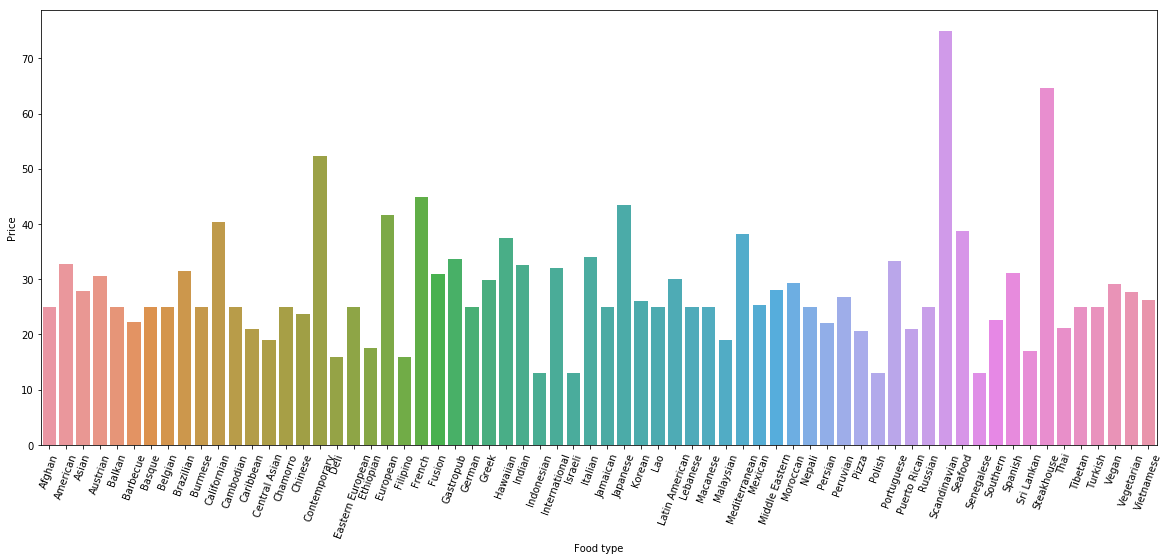

In [157]:
df_graph = final_df.groupby('Food type').mean()
df_graph.reset_index(inplace=True)
print(df_graph.head(2))

plt.figure(figsize=(20, 8))
plt.xticks(rotation=70)
sns.barplot(x='Food type', y='Price', data=df_graph)

                 Neighborhood  name  market  Food type  Price
7    Greenwich & West Village  56.0      56         56     56
13                     Queens  51.0      51         51     51


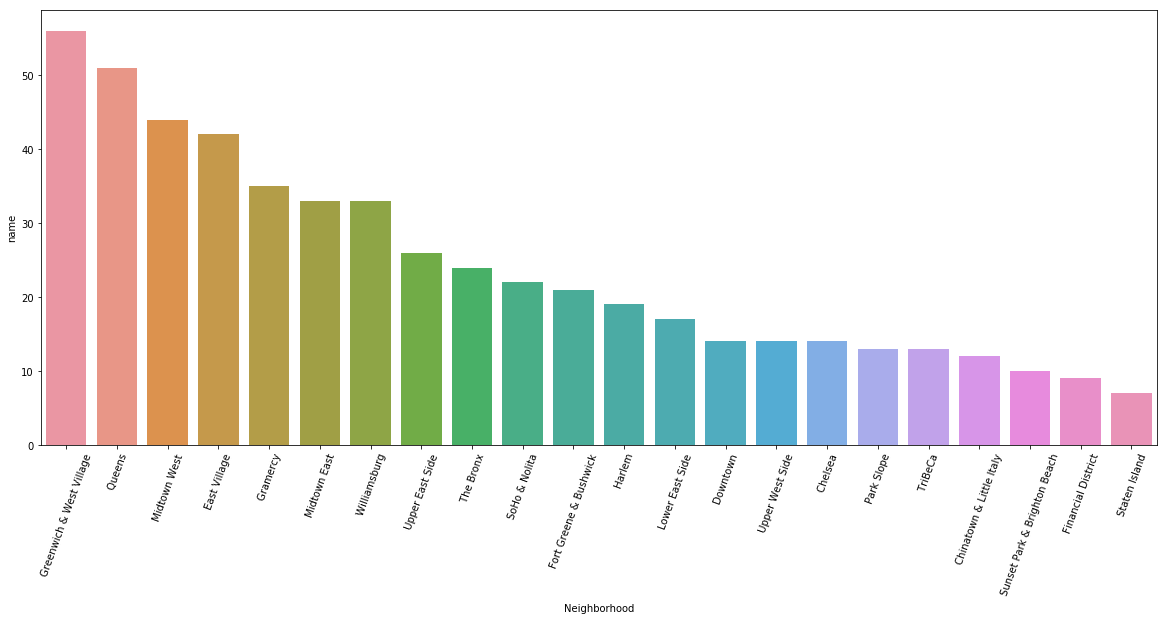

In [158]:
df_graph = final_df[(final_df['market'] == 'New York City')].groupby('Neighborhood').count()
df_graph.reset_index(inplace=True)
df_graph['name'] = df_graph['name'].astype(float)
df_graph = df_graph.sort_values(by='name', ascending = False)
print(df_graph.head(2))

plt.figure(figsize=(20, 8))
plt.xticks(rotation=70)
sns.barplot(x='Neighborhood', y='name', data=df_graph)

    Neighborhood  name  market  Food type  Price
7    Napa Valley  32.0      32         32     32
10     Peninsula  30.0      30         30     30


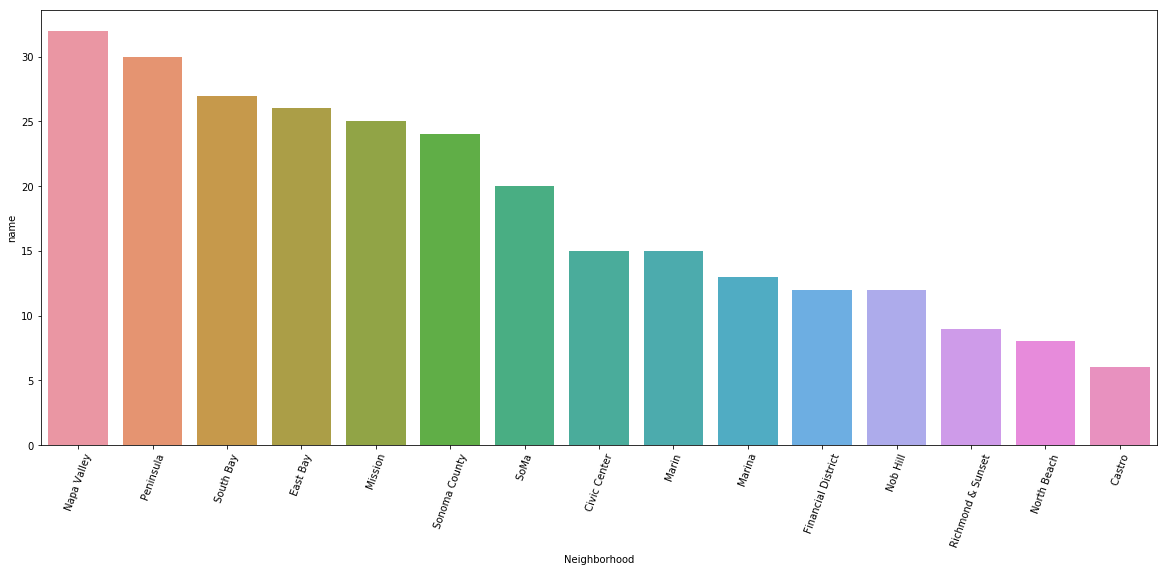

In [159]:
df_graph = final_df[(final_df['market'] == 'San Francisco')].groupby('Neighborhood').count()
df_graph.reset_index(inplace=True)
df_graph['name'] = df_graph['name'].astype(float)
df_graph = df_graph.sort_values(by='name', ascending = False)
print(df_graph.head(2))

plt.figure(figsize=(20, 8))
plt.xticks(rotation=70)
sns.barplot(x='Neighborhood', y='name', data=df_graph)

## <font color="#00cc99">Export Results & Data</font> 
- Now export all of our data to both a CSV and a google sheet so you can share with others!

In [161]:
# Export Final File, CSV and to Soogle Sheets
spreadsheet = '/random_projects'
wks_name = 'Michelin Star Restaurants'
d2g.upload(final_df, spreadsheet, wks_name)

final_df.to_csv('michelin_star_restaurants.csv')

print('Script Complete!')
output = (time() - t)
'This script took ' + str(round(output,2)) + ' seconds'

Script Complete!


'This script took 78.93 seconds'